# 1. Introduction

Brief overview of the project and the techniques to be used.
Description of the dataset (source, format, columns, etc.).

# 2. Data Preprocessing
- Importing necessary libraries.
- Loading the Bitcoin pricing data.
- Handling missing values and outliers.
- Resampling the data to handle any irregularities in time intervals.

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime



### Import Data

In [2]:
# The data was sourced from Kaggle for this testing purposes but for the actual script deployment, we are considering using services such as coin gecko
# df = pd.read_csv('./sample-data/BTC-USD.csv')
# df = pd.read_csv('./sample-data/BTC-2017min.csv')
# df = pd.read_csv('./sample-data/BTC-2018min.csv')
# df = pd.read_csv('./sample-data/BTC-2019min.csv')
# df = pd.read_csv('./sample-data/BTC-2020min.csv')
# df = pd.read_csv('./sample-data/BTC-Hourly.csv')
# df = pd.read_csv('./sample-data/BTC-Daily.csv')
df = pd.read_csv('../data/BTC-2021min.csv')

#Import Social Sentiment Anaylsis Data

#Soon to join data


# Create a new DataFrame with rows within the time range of January 2021
#jan_2021_data = df[(df['date'] >= '2021-01-01') & (df['date'] < '2021-02-01')]
# df = df[(df['date'] >= '2021-01-01') & (df['date'] < '2021-02-01')]
# test_data = df[(df['date'] >= '2021-02-01') & (df['date'] < '2021-03-01')]


### Clean the data and add 'features'

In [3]:
# Convert the column headers to camel case
def camel_case(column_name):
    return ''.join(word[0].upper() + word[1:] for word in column_name.split('_'))

df.columns = df.columns.map(camel_case)


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df

,Unix,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,,
2022-03-01 03:43:00,1646106180,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
2022-03-01 03:41:00,1646106060,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2022-03-01 03:40:00,1646106000,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
2022-03-01 03:39:00,1646105940,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2022-03-01 03:38:00,1646105880,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...
2021-01-01 00:05:00,1609459500,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
2021-01-01 00:04:00,1609459440,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
2021-01-01 00:03:00,1609459380,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387


# 3. Time Series Analysis
Visualizing the historical pricing data to identify trends and seasonality.
Decomposing the time series into trend, seasonality, and residual components.
Applying yearly and weekly trend analysis techniques.

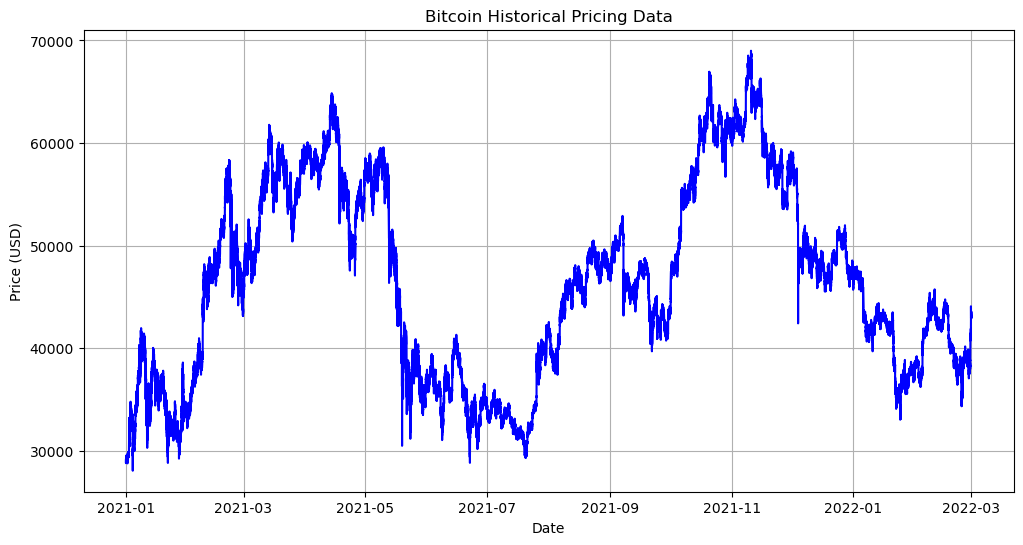

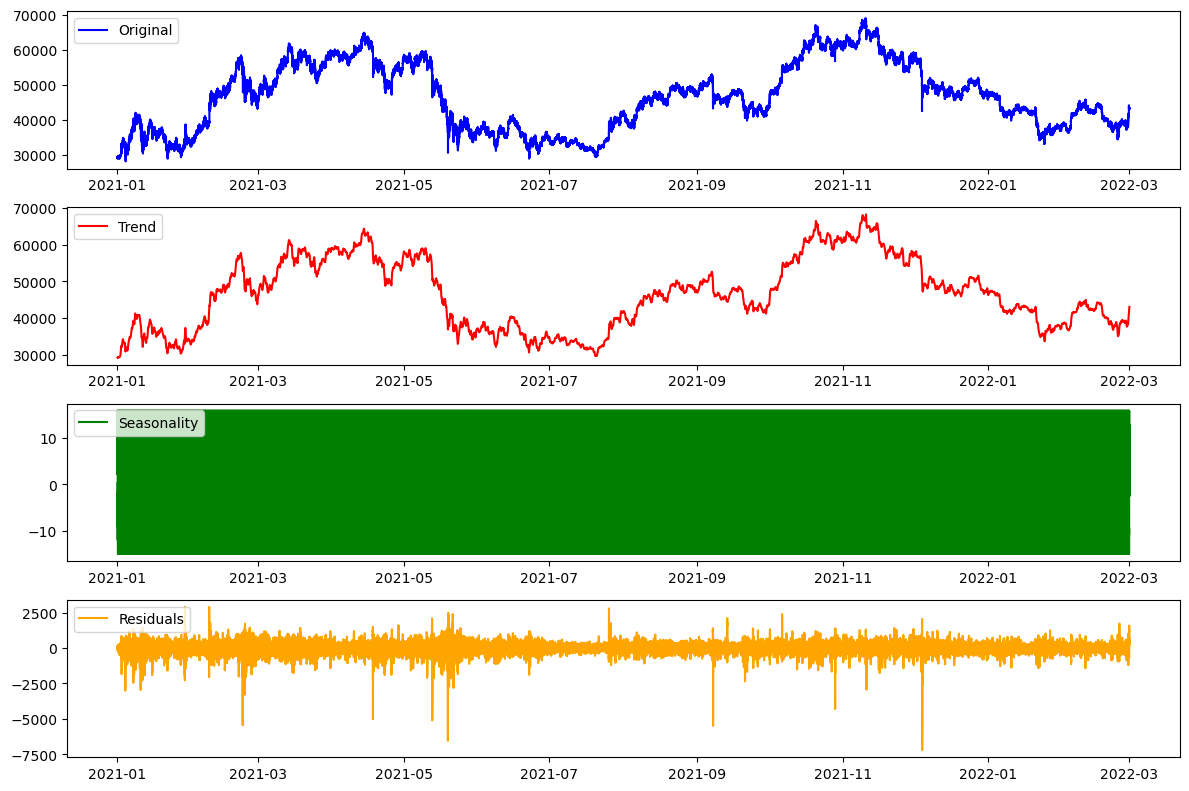

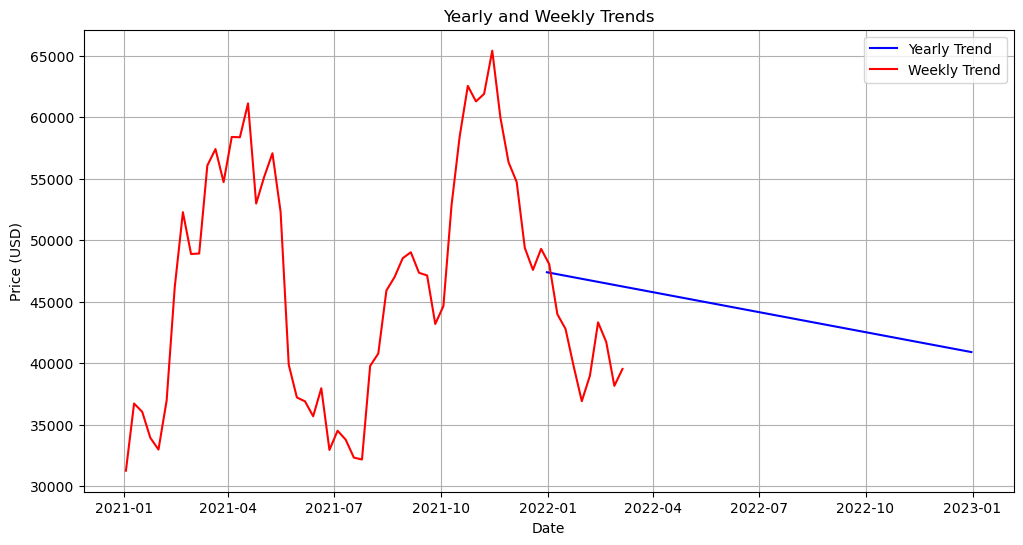

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load historical pricing data
#bitcoin_data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col='Date')
bitcoin_data = df

# Visualize historical pricing data
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Close'], color='blue')
plt.title('Bitcoin Historical Pricing Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Decompose time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(bitcoin_data['Close'], model='additive', period=365)

# Plot decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Apply yearly trend analysis
yearly_trend = decomposition.trend.resample('Y').mean()

# Apply weekly trend analysis
weekly_trend = decomposition.trend.resample('W').mean()

# Visualize yearly and weekly trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_trend, label='Yearly Trend', color='blue')
plt.plot(weekly_trend, label='Weekly Trend', color='red')
plt.title('Yearly and Weekly Trends')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# 4. Correlation Analysis
Loading additional stock pricing data (if available).
Exploring correlations between Bitcoin and other stocks to understand sector-wide impacts.
Visualizing correlation matrices and heatmaps.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


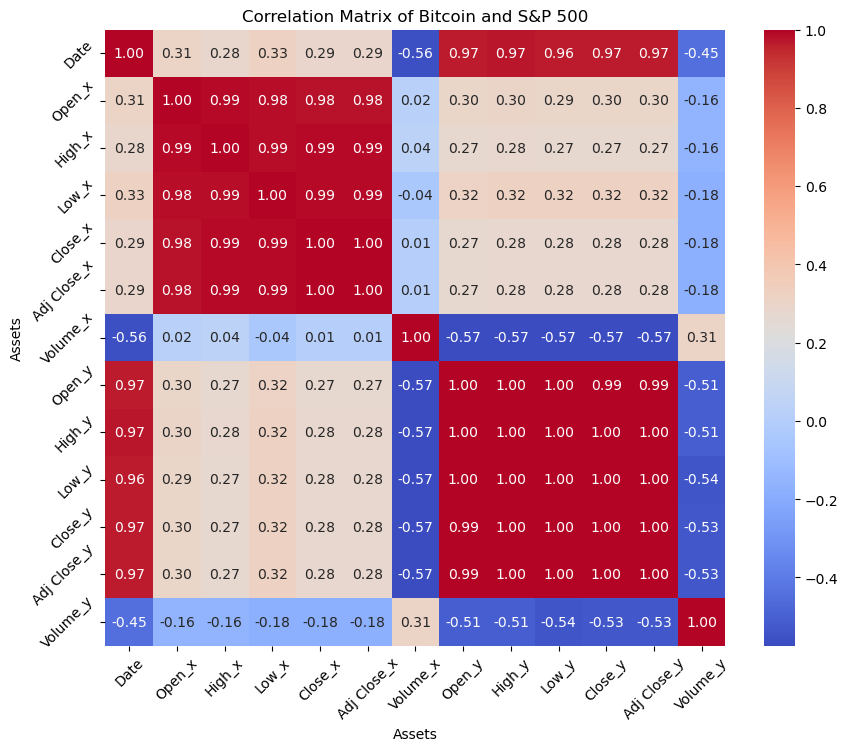

In [6]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define ticker symbols
bitcoin_symbol = 'BTC-USD'
sp500_symbol = '^GSPC'

# Define start and end dates for data retrieval
start_date = '2021-01-01'
end_date = '2022-01-01'

# Fetch Bitcoin data from Yahoo Finance
bitcoin_data = yf.download(bitcoin_symbol, start=start_date, end=end_date)

# Fetch S&P 500 data from Yahoo Finance
sp500_data = yf.download(sp500_symbol, start=start_date, end=end_date)

# Reset index for both datasets
bitcoin_data.reset_index(inplace=True)
sp500_data.reset_index(inplace=True)

# Merge Bitcoin data with S&P 500 data on Date
merged_data = pd.merge(bitcoin_data, sp500_data, how='inner', on='Date')

# Calculate correlation matrix
correlation_matrix = merged_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bitcoin and S&P 500')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# 5. Machine Learning for Recommendations
- Feature engineering: creating relevant features from the historical pricing data.
- Labeling data: defining buy, sell, or hold labels based on certain criteria (e.g., price movements).
- Splitting the data into training and testing sets.
- Training classifiers such as logistic regression, decision trees, or random forests.
- Evaluating model performance using metrics like accuracy, precision, recall, and F1-score.
- Generating buy, sell, or hold recommendations based on model predictions.

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Feature Engineering
# Let's assume you have already performed feature engineering and created relevant features

# Labeling Data
# Define a function to label data as buy, sell, or hold based on price movements
def label_data(data):
    labels = []
    for i in range(len(data) - 1):
        if data[i + 1] > data[i]:
            labels.append('buy')
        elif data[i + 1] < data[i]:
            labels.append('sell')
        else:
            labels.append('hold')
    return labels

# Assuming the Bitcoin data has 'Date' and 'Close' columns
bitcoin_prices = bitcoin_data[['Date', 'Close']]
bitcoin_prices.columns = ['Date', 'Close_BTC']

# Assuming the S&P500 data has 'Date' and 'Close' columns
sp500_prices = sp500_data[['Date', 'Close']]
sp500_prices.columns = ['Date', 'Close_SP500']

bitcoin_prices.set_index('Date', inplace=True)

sp500_prices.set_index('Date', inplace=True)



# Now you can merge the Bitcoin and S&P500 data on the 'Date' column
merged_data = pd.merge(bitcoin_prices, sp500_prices, on='Date', how='inner')


merged_data





,Close_BTC,Close_SP500
Date,,
2021-01-04,31971.914062,3700.649902
2021-01-05,33992.429688,3726.860107
2021-01-06,36824.363281,3748.139893
2021-01-07,39371.042969,3803.790039
2021-01-08,40797.609375,3824.679932
...,...,...
2021-12-27,50640.417969,4791.189941
2021-12-28,47588.855469,4786.350098
2021-12-29,46444.710938,4793.060059


In [16]:
# Shift the S&P500 prices by one day
sp500_prices_shifted = sp500_prices.shift(-1)

# Drop the last row from Bitcoin prices to match the shifted S&P500 prices
bitcoin_prices_shifted = bitcoin_prices[:-1]

# Combine the shifted Bitcoin and S&P500 prices into X
X = np.column_stack((bitcoin_prices_shifted["Close_BTC"], sp500_prices_shifted["Close_SP500"]))

# Use the shifted Bitcoin prices as y
y = bitcoin_prices_shifted['Close_BTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 364 and the array at index 1 has size 252

In [ ]:
# Evaluating model performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


In [ ]:
# Generating recommendations based on model predictions
# Let's assume we have a function to convert model predictions into buy, sell, or hold recommendations
def generate_recommendations(predictions):
    recommendations = []
    for pred in predictions:
        if pred == 'buy':
            recommendations.append('Buy Bitcoin')
        elif pred == 'sell':
            recommendations.append('Sell Bitcoin')
        else:
            recommendations.append('Hold Bitcoin')
    return recommendations

recommendations = generate_recommendations(y_pred)
print("Recommendations:")
for date, recommendation in zip(merged_data['Date'][len(X_train):], recommendations):
    print(f"{date}: {recommendation}")

# 6. Conclusion
Summary of findings.
Limitations and potential areas for improvement.
Future work and next steps.



# 7. References
Citations for any external sources or libraries used.

- yfinance by Yahoo (Bitcoin data and S&P 500)
- BTC data (https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd)